In [1]:
from sklearn.datasets import load_iris
i= load_iris()

In [4]:
dir(i)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
i.DESCR [:500] + '...'

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= =====...'

<b> sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n </b>

In [15]:
i.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [16]:
i.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
import pandas as pd
df= pd.DataFrame(i.data)

In [22]:
df= pd.DataFrame(i.data,columns=i.feature_names)
df["Species"] = i.target #the outcome we aim to predict or explain using our model (given to us in test dataset)

In [25]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [26]:
type(df)

pandas.core.frame.DataFrame

In [29]:
s = df.groupby("Species")
#s.get_group(0)

In [30]:
setosa= s.get_group(0)
versi= s.get_group(1)
verginica= s.get_group(2)

In [31]:
setosa.head(),versi.head(),verginica.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    Species  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 50                7.0               3.2                4.7               1.4   
 51                6.4               3.2                4.5               1.5   
 52                6.9               3.1                4.9               1.5   
 53                5.5               2.3                4.0               1.3   
 54                6.5      

Splitting into dependant and independant

In [35]:
#dependant is all the flower features
x = df.drop("Species",axis=1)
y = df[["Species"]]

In [37]:
import matplotlib.pyplot as plt

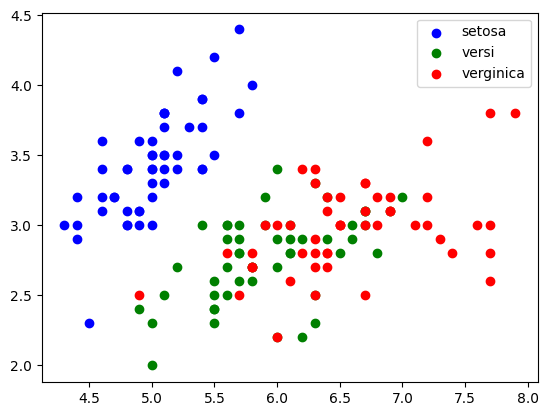

In [45]:
plt.scatter(setosa["sepal length (cm)"],setosa["sepal width (cm)"],label="soujketosa",color="blue")
plt.scatter(versi["sepal length (cm)"],versi["sepal width (cm)"],label="versi",color="green")
plt.scatter(verginica["sepal length (cm)"],verginica["sepal width (cm)"],label="verginica",color="red")
plt.legend()

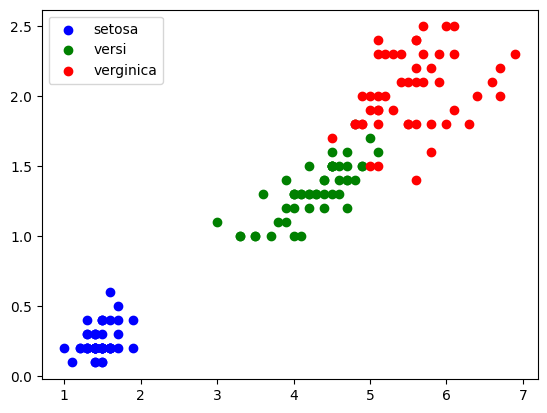

In [46]:
plt.scatter(setosa["petal length (cm)"],setosa["petal width (cm)"],label="setosa",color="blue")
plt.scatter(versi["petal length (cm)"],versi["petal width (cm)"],label="versi",color="green")
plt.scatter(verginica["petal length (cm)"],verginica["petal width (cm)"],label="verginica",color="red")
plt.legend()

In [47]:
from sklearn.model_selection import train_test_split

In [58]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

In [59]:
len(train_x), len(test_x)

(105, 45)

In [125]:
from sklearn.neighbors import KNeighborsClassifier #KNN

In [126]:
model = KNeighborsClassifier()

In [127]:
model.fit(train_x,train_y)

/home/admin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [128]:
model.fit(train_x,train_y.values.ravel())

KNeighborsClassifier()

In [129]:
model.score(test_x,test_y)

0.9555555555555556

In [130]:
model.predict(test_x)

array([1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0,
       0])

In [131]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(train_x,train_y.values.ravel())
model.score(test_x,test_y)

0.9555555555555556

In [139]:
max_acc= 0
max_i = 0
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y.values.ravel())
    score = model.score(test_x,test_y)
    if score>max_acc:
        max_acc=score
        max_i=i

In [140]:
max_acc,max_i

(1.0, 7)

#### I suppose <b>7</b> it is

In [141]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_x,train_y.values.ravel())
model.score(test_x,test_y)

1.0